list of Fastai techniques [here](https://blog.floydhub.com/ten-techniques-from-fast-ai/) <br>
cifar10 models : [here](https://github.com/kuangliu/pytorch-cifar) <br>
Torchsamples has the same structure : [here](https://github.com/ncullen93/torchsample)

TODO
- freeze layer
- train multiple size of image
- save model (& reset model)
- early stop
- data loader wrapper

In [6]:
%reload_ext autoreload
%autoreload 2
import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import transforms
import torchvision
import copy
from exitai.learner import Learner

%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
torch.manual_seed(1)

In [8]:
transform_train = transforms.Compose([
                                   transforms.RandomCrop(32, padding=4),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.RandomAffine(15, scale=(.9,1.2)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,), (1,))
                               ])
transform_test = transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,), (1,))
                               ])
mnist_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
mnist_testset = datasets.CIFAR10(root='./data', train=False, download=False, transform=transform_test)
data_loader_train = DataLoader(mnist_trainset, 64, shuffle=True, num_workers=8)
data_loader_test = DataLoader(mnist_testset, 64, shuffle=True, num_workers=8)

Files already downloaded and verified


In [4]:
import models.RestNet as RestNet
model = RestNet.ResNet18() # copy from fastai
criterion = F.cross_entropy

In [6]:
# model = torchvision.models.resnet18(pretrained=True)
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, 10)

### Train

### Find learning rate

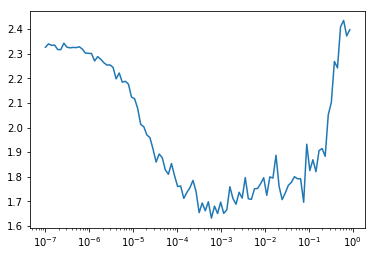

In [13]:
model = RestNet.ResNet18()
learner = Learner(data_loader_train, data_loader_test, model, criterion)
learner.lr_find(1e-7, 1)

### Train with static lr

In [18]:
model = RestNet.ResNet18()
learner = Learner(data_loader_train, data_loader_test, model, criterion)
learner.fit(0.03, 50, cycle=None)

---- epoch:0 ------
   [train] Average loss: 2.8474, acc: 32.43%
   [test] Average loss: 2.6822, acc: 39.34%
---- epoch:1 ------
   [train] Average loss: 2.1283, acc: 50.43%
   [test] Average loss: 1.7862, acc: 59.63%
---- epoch:2 ------
   [train] Average loss: 1.7689, acc: 59.49%
   [test] Average loss: 1.8365, acc: 61.24%
---- epoch:3 ------
   [train] Average loss: 1.5348, acc: 65.43%
   [test] Average loss: 1.4162, acc: 68.60%
---- epoch:4 ------
   [train] Average loss: 1.3577, acc: 69.48%
   [test] Average loss: 1.2670, acc: 72.14%
---- epoch:5 ------
   [train] Average loss: 1.2029, acc: 73.39%
   [test] Average loss: 1.1186, acc: 75.95%
---- epoch:6 ------
   [train] Average loss: 1.1037, acc: 75.46%
   [test] Average loss: 0.9430, acc: 79.89%
---- epoch:7 ------
   [train] Average loss: 1.0221, acc: 77.21%
   [test] Average loss: 1.0853, acc: 76.34%
---- epoch:8 ------
   [train] Average loss: 0.9631, acc: 78.62%
   [test] Average loss: 0.9401, acc: 80.17%
---- epoch:9 ------

### Train with cos annealing lr

In [9]:
model = RestNet.ResNet18()
learner = Learner(data_loader_train, data_loader_test, model, criterion)
learner.fit([0.001, 0.1], 100)

---- epoch:0 ------
   [train] Average loss: 2.5143, acc: 40.62%
   [test] Average loss: 1.8893, acc: 56.01%
---- epoch:1 ------
   [train] Average loss: 1.7287, acc: 60.36%
   [test] Average loss: 1.4451, acc: 66.75%
---- epoch:2 ------
   [train] Average loss: 1.7996, acc: 58.70%
   [test] Average loss: 1.4731, acc: 66.52%
---- epoch:3 ------
   [train] Average loss: 1.4100, acc: 68.24%
   [test] Average loss: 1.1904, acc: 73.54%
---- epoch:4 ------
   [train] Average loss: 1.1246, acc: 74.78%
   [test] Average loss: 0.9699, acc: 78.95%
---- epoch:5 ------
   [train] Average loss: 0.9446, acc: 78.69%
   [test] Average loss: 0.8477, acc: 81.35%
---- epoch:6 ------
   [train] Average loss: 1.2559, acc: 71.84%
   [test] Average loss: 1.0613, acc: 76.95%
---- epoch:7 ------
   [train] Average loss: 1.1050, acc: 75.47%
   [test] Average loss: 0.9801, acc: 78.85%
---- epoch:8 ------
   [train] Average loss: 0.9723, acc: 78.50%
   [test] Average loss: 0.9838, acc: 79.19%
---- epoch:9 ------